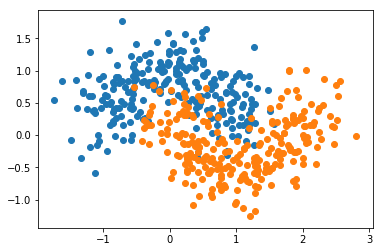

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 随机森林

In [3]:
def plot_deciBiOn_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1),
    )
   
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF590","#90CAF9"])
    plt.contourf(x0,x1,zz,cmap=custom_cmap,linewidth=5)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X,y)
rf_clf.oob_score_

0.894

/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


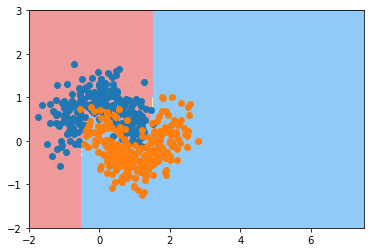

In [5]:
plot_deciBiOn_boundary(rf_clf,axis=[-2,7.5,-2,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### Extra-Tree

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=666, n_jobs=-1,bootstrap=True)
extra_clf.fit(X,y)
extra_clf.oob_score_

0.894

/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


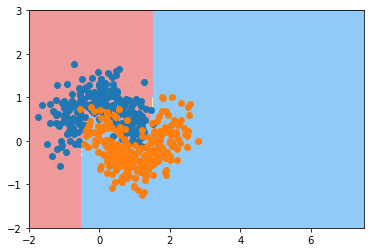

In [10]:
plot_deciBiOn_boundary(extra_clf,axis=[-2,7.5,-2,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()